#Semantic Segmentation by Resnet50 & Serexnext50

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Install Libraries

In [2]:
!pip install keras-segmentation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.7 MB/s 
     |████████████████████████████████| 753 kB 64.2 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=3a5d6a9ac3c5f4ce09e26fa225a244af38d21eb14f4967c75500a7544bdabc55
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0


In [12]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.9 MB/s 


#Import Libraries

In [17]:
import os
import skimage.io as io
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from IPython.core.display import HTML
from torch.utils.data import Dataset, DataLoader
import cv2
import glob
import numpy
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import skimage.color as color
from skimage import restoration
from skimage import img_as_float
from keras.preprocessing.image import ImageDataGenerator

import sklearn.externals
import joblib

In [14]:
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
import skimage.segmentation as seg
import skimage.color as color
from skimage import restoration
from skimage import img_as_float

In [4]:
from skimage.segmentation import mark_boundaries
from PIL import Image

#Function to find the path to drive

In [5]:
#from genericpath import isdir
import os
root_dir = '/content/drive/My Drive/'
#Project Folder
project_folder = 'Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/'
#Function to create & set current directory
def create_and_set_directory(project_folder):
  if os.path.isdir(root_dir+project_folder)==False:

    os.mkdir(root_dir+project_folder)
    print(root_dir+project_folder+'did not existed & created')
#Change the OS path to project folder as current path
os.chdir(root_dir+project_folder)

In [6]:
os.chdir('/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1')

#Data Loading

In [7]:
train_image_dirs=os.path.join('/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/images_prepped_train')
train_label_dirs=os.path.join('/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/annotations_prepped_train')
test_image_dirs=os.path.join('/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/images_prepped_test')
test_label_dirs=os.path.join('/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/annotations_prepped_test')

In [8]:
train_image = [os.path.join(train_image_dirs,fname) for fname in os.listdir(train_image_dirs)[:]]
train_label = [os.path.join(train_label_dirs,fname) for fname in os.listdir(train_label_dirs)[:]]
test_image = [os.path.join(test_image_dirs,fname) for fname in os.listdir(test_image_dirs)[:]]
test_label = [os.path.join(test_label_dirs,fname) for fname in os.listdir(test_label_dirs)[:]]

image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

#Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

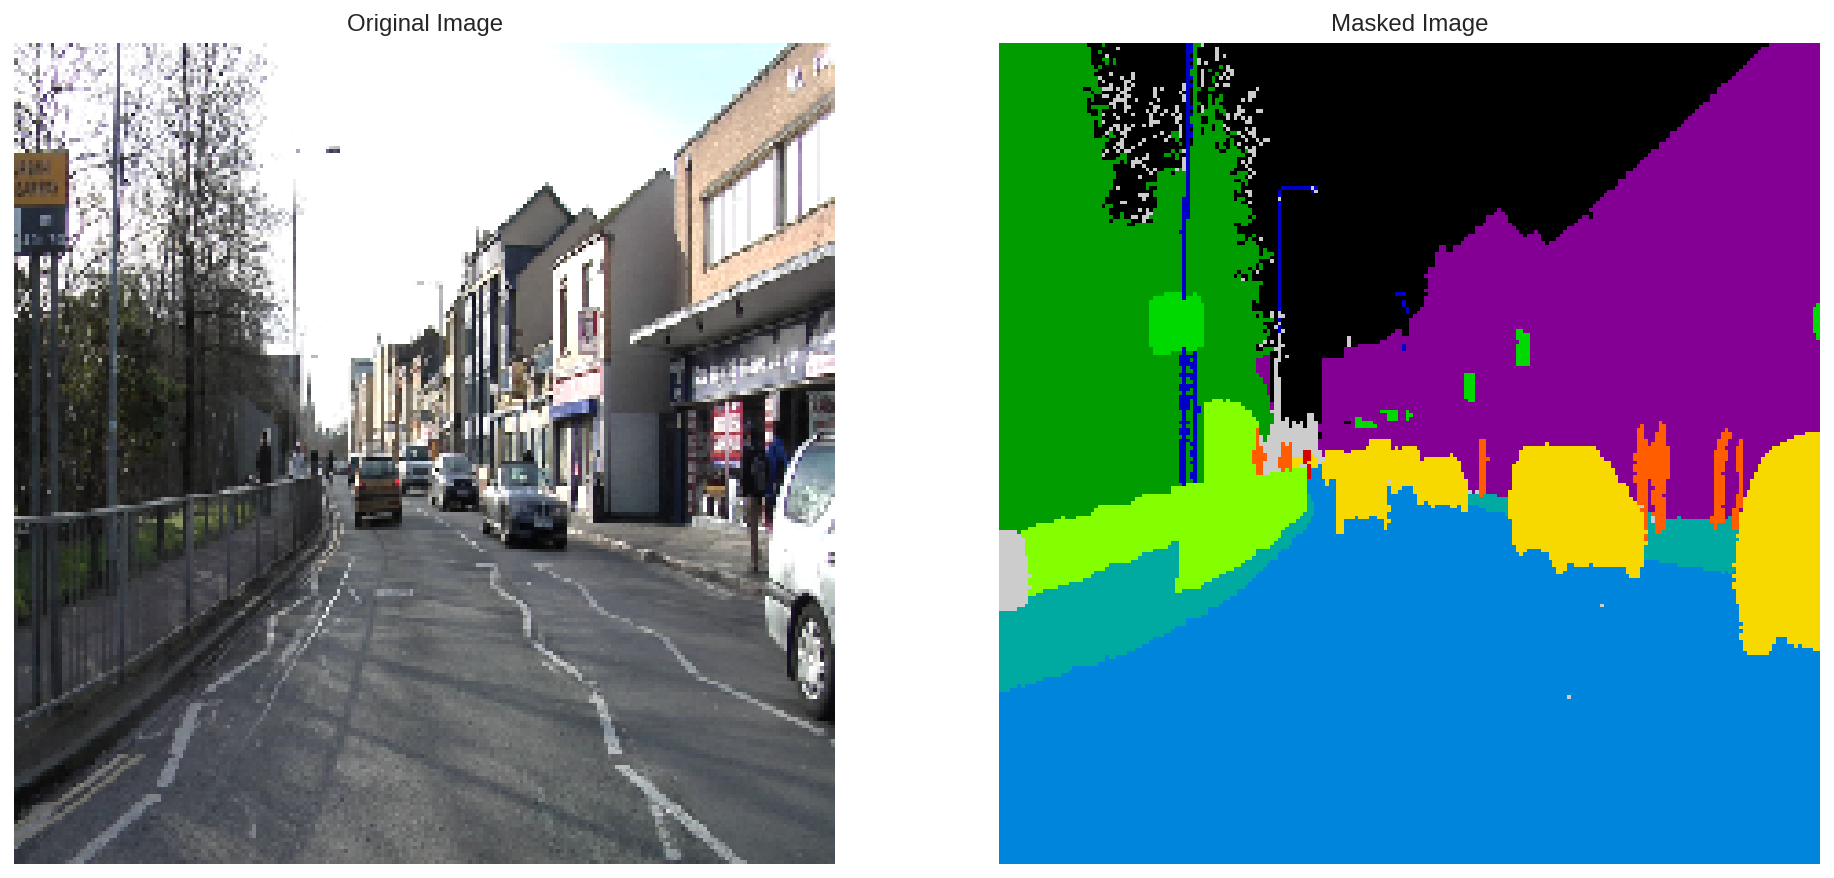

In [9]:
plt.figure(figsize = (25,25))
cells_color=[1, 2, 0]

image= train_images[200]
mask= train_labels[200]


#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show

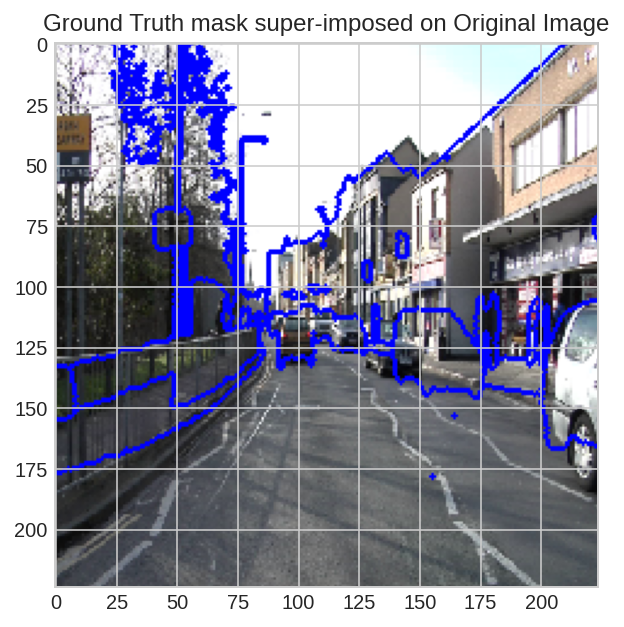

In [10]:
#Mark the boundaries on original image
plt.figure(figsize=(5,5))
boundaries = seg.mark_boundaries(image, mask,color=(0,0,1), mode='thin')
plt.imshow(boundaries)
plt.title('Ground Truth mask super‐imposed on Original Image')
plt.show()

#Transfer Learning by Resnet50 Model



#By using Imagenet pre-trained encoder for backbone of UNET(Resnet50)

In [15]:
from segmentation_models import Unet
model = Unet(backbone_name='resnet50', classes=11, encoder_weights='imagenet', encoder_freeze=True)
model.compile(optimizer='Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_18 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

### Only 9,060,239 params being trained out of 32,562,709

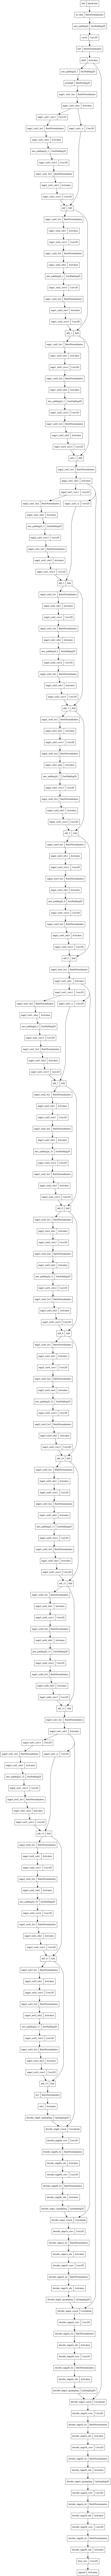

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/Unet_Resnet50_model.png')

In [ ]:
TARGET_SIZE = (224,224)
BATCH_SIZE = 6

def create_augmentation_pipeline():
    augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p = 0.5), # Apply horizontal flip to 50% of images
        A.OneOf(
            [
                # Apply one of transforms to 50% of images
                A.RandomContrast(), # Apply random contrast
                A.RandomGamma(), # Apply random gamma
                A.RandomBrightness(), # Apply random brightness
            ],
            p = 0.5 
        ),
        A.OneOf(
            [
                # Apply one of transforms to 50% images
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion()
            ],
            p = 0.5 
        )
    ],
    p = 0.9 # In 10% of cases keep same image because that's interesting also
    )   
    return augmentation_pipeline
  
def create_datagenerator(PATH):
    options = {'horizontal_flip': True, 'vertical_flip': True}
    image_datagen = ImageDataGenerator(rescale=1./255, **options)
    mask_datagen = ImageDataGenerator(**options)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen_mask = ImageDataGenerator(rescale=1)
    
    # Create custom zip and custom batch_size
    def combine_generator(gen1, gen2, batch_size=6,training=True):
        while True:
            image_batch, label_batch = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
            image_batch, label_batch = np.expand_dims(image_batch,axis=0), np.expand_dims(label_batch,axis=0)

            for i in range(batch_size - 1):
                image_i,label_i = next(gen1)[0], np.expand_dims(next(gen2)[0][:,:,0],axis=-1)
              
                if training == True:
                    aug_pipeline = create_augmentation_pipeline()
                    augmented = aug_pipeline(image=image_i, mask=label_i)
                    image_i, label_i = augmented['image'], augmented['mask']

                image_i, label_i = np.expand_dims(image_i,axis=0),np.expand_dims(label_i,axis=0)
                image_batch = np.concatenate([image_batch,image_i],axis=0)
                label_batch = np.concatenate([label_batch,label_i],axis=0)
              
            yield((image_batch,label_batch))


    seed = np.random.randint(0,1e5)

    train_image_generator = image_datagen.flow_from_directory(PATH+'images_prepped_train', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    train_mask_generator = mask_datagen.flow_from_directory(PATH+'annotations_prepped_train', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    train_generator = combine_generator(train_image_generator, train_mask_generator,training=True)
    
    val_image_generator = val_datagen.flow_from_directory(PATH+'images_prepped_test', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    val_mask_generator = val_datagen_mask.flow_from_directory(PATH+'annotations_prepped_test', seed=seed, target_size=TARGET_SIZE, class_mode=None, batch_size=BATCH_SIZE)
    val_generator = combine_generator(val_image_generator, val_mask_generator,training=False)
    
    return train_generator, val_generator

#Data Augmentation 

In [31]:
seed=24
img_data_gen_args = dict(rotation_range=45,
                     shear_range=0.2,
                     zoom_range=0.2,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
labels_data_gen_args = dict(rotation_range=45,
                     shear_range=0.2,
                     zoom_range=0.2,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')


image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(train_images, augment=True, seed=seed)

image_generator = image_data_generator.flow(train_images, seed=seed)
valid_img_generator = image_data_generator.flow(test_images, seed=seed)
tr_labels=train_labels.reshape(367, 224, 224,1)
ts_labels=test_labels.reshape(101, 224, 224,1)
mask_data_generator = ImageDataGenerator(**labels_data_gen_args)
mask_data_generator.fit(tr_labels+(1,), augment=True, seed=seed)

mask_generator = mask_data_generator.flow(tr_labels, seed=seed)
valid_mask_generator = mask_data_generator.flow(ts_labels, seed=seed)

def img_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

tr_gen = img_generator(image_generator, mask_generator)

val_gen = img_generator(valid_img_generator, valid_mask_generator)

#Function to train the model

In [32]:
def train_model(model, gen1, gen2, typeModel):
       
        epochs=20
        batch_size=32
        steps_per_epoch= 4*(len(train_images))//batch_size
            
        # We'll stop training if no improvement after some epochs
        reduce_learningrate = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
        
        # Save the best model during the traning
        checkpointer = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/model' + str(typeModel) +'.h5'
                                        ,verbose=1
                                        ,save_weights_only=True)
        # Train
        training = model.fit_generator(generator=gen1
                                ,epochs=epochs
                                ,validation_data=gen2
                                ,steps_per_epoch=steps_per_epoch
                                ,validation_steps=steps_per_epoch
                                ,callbacks=[checkpointer, reduce_learningrate])
        joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/model_' + str(typeModel) +'.pkl', compress=1)
        joblib.dump(training, '/content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/training_' + str(typeModel) +'.pkl', compress=1)
        
        return training

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
typeModel='Unet_Resnet50'
trainer1 = train_model(model, tr_gen, val_gen, typeModel)
print("Unet_Resnet50 Trained")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: -5.0579 - iou_score: 1.6591 - Accuracy: 0.0015
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 75s 1s/step - loss: -5.0579 - iou_score: 1.6591 - Accuracy: 0.0015 - val_loss: -75.6138 - val_iou_score: 2.5113 - val_Accuracy: 0.3462 - lr: 0.0010
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: -20.1990 - iou_score: 2.4372 - Accuracy: 0.1141
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 49s 1s/step - loss: -20.1990 - iou_score: 2.4372 - Accuracy: 0.1141 - val_loss: -103.1818 - val_iou_score: 2.4714 - val_Accuracy: 0.3347 - lr: 0.0010
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: -39.4709 - iou_score: 2.6249 - Accuracy: 0.3142
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -39.4709 - iou_score: 2.6249 - Accuracy: 0.3142 - val_loss: -56.6576 - val_iou_score: 3.0571 - val_Accuracy: 0.2786 - lr: 0.0010
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: -62.0212 - iou_score: 2.7741 - Accuracy: 0.3829
Epoch 4: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -62.0212 - iou_score: 2.7741 - Accuracy: 0.3829 - val_loss: -57.9215 - val_iou_score: 2.8385 - val_Accuracy: 0.5860 - lr: 0.0010
Epoch 5/20
45/45 [==============================] - ETA: 0s - loss: -91.4578 - iou_score: 2.7275 - Accuracy: 0.4226
Epoch 5: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -91.4578 - iou_score: 2.7275 - Accuracy: 0.4226 - val_loss: -171.6746 - val_iou_score: 2.4624 - val_Accuracy: 0.6292 - lr: 0.0010
Epoch 6/20
45/45 [==============================] - ETA: 0s - loss: -127.7173 - iou_score: 2.5262 - Accuracy: 0.4585
Epoch 6: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -127.7173 - iou_score: 2.5262 - Accuracy: 0.4585 - val_loss: -488.6346 - val_iou_score: 3.1441 - val_Accuracy: 0.8696 - lr: 0.0010
Epoch 7/20
45/45 [==============================] - ETA: 0s - loss: -166.3554 - iou_score: 2.5628 - Accuracy: 0.4825
Epoch 7: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -166.3554 - iou_score: 2.5628 - Accuracy: 0.4825 - val_loss: -222.4972 - val_iou_score: 2.9781 - val_Accuracy: 0.7649 - lr: 0.0010
Epoch 8/20
45/45 [==============================] - ETA: 0s - loss: -212.2810 - iou_score: 2.6082 - Accuracy: 0.5013
Epoch 8: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -212.2810 - iou_score: 2.6082 - Accuracy: 0.5013 - val_loss: -235.3709 - val_iou_score: 3.0761 - val_Accuracy: 0.7588 - lr: 0.0010
Epoch 9/20
45/45 [==============================] - ETA: 0s - loss: -261.9586 - iou_score: 2.6397 - Accuracy: 0.5256
Epoch 9: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -261.9586 - iou_score: 2.6397 - Accuracy: 0.5256 - val_loss: -505.8127 - val_iou_score: 2.9198 - val_Accuracy: 0.6484 - lr: 0.0010
Epoch 10/20
45/45 [==============================] - ETA: 0s - loss: -320.0315 - iou_score: 2.6726 - Accuracy: 0.5509
Epoch 10: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 44s 997ms/step - loss: -320.0315 - iou_score: 2.6726 - Accuracy: 0.5509 - val_loss: -480.8676 - val_iou_score: 3.0539 - val_Accuracy: 0.7567 - lr: 0.0010
Epoch 11/20
45/45 [==============================] - ETA: 0s - loss: -384.2514 - iou_score: 2.6810 - Accuracy: 0.5719
Epoch 11: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 44s 998ms/step - loss: -384.2514 - iou_score: 2.6810 - Accuracy: 0.5719 - val_loss: -600.5388 - val_iou_score: 2.9129 - val_Accuracy: 0.6714 - lr: 0.0010
Epoch 12/20
45/45 [==============================] - ETA: 0s - loss: -451.8275 - iou_score: 2.6983 - Accuracy: 0.5847
Epoch 12: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 46s 1s/step - loss: -451.8275 - iou_score: 2.6983 - Accuracy: 0.5847 - val_loss: -478.2690 - val_iou_score: 2.9123 - val_Accuracy: 0.7065 - lr: 0.0010
Epoch 13/20
45/45 [==============================] - ETA: 0s - loss: -523.9111 - iou_score: 2.7211 - Accuracy: 0.6013
Epoch 13: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -523.9111 - iou_score: 2.7211 - Accuracy: 0.6013 - val_loss: -673.8391 - val_iou_score: 2.8039 - val_Accuracy: 0.6741 - lr: 0.0010
Epoch 14/20
45/45 [==============================] - ETA: 0s - loss: -609.7738 - iou_score: 2.7606 - Accuracy: 0.6198
Epoch 14: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 44s 988ms/step - loss: -609.7738 - iou_score: 2.7606 - Accuracy: 0.6198 - val_loss: -783.7747 - val_iou_score: 3.0783 - val_Accuracy: 0.7681 - lr: 0.0010
Epoch 15/20
45/45 [==============================] - ETA: 0s - loss: -689.6104 - iou_score: 2.7435 - Accuracy: 0.6133
Epoch 15: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -689.6104 - iou_score: 2.7435 - Accuracy: 0.6133 - val_loss: -647.8054 - val_iou_score: 3.0729 - val_Accuracy: 0.7932 - lr: 0.0010
Epoch 16/20
45/45 [==============================] - ETA: 0s - loss: -779.6072 - iou_score: 2.7625 - Accuracy: 0.6241
Epoch 16: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 44s 988ms/step - loss: -779.6072 - iou_score: 2.7625 - Accuracy: 0.6241 - val_loss: -937.7746 - val_iou_score: 3.0239 - val_Accuracy: 0.7422 - lr: 0.0010
Epoch 17/20
45/45 [==============================] - ETA: 0s - loss: -870.2293 - iou_score: 2.7637 - Accuracy: 0.6197
Epoch 17: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 45s 1s/step - loss: -870.2293 - iou_score: 2.7637 - Accuracy: 0.6197 - val_loss: -1056.1390 - val_iou_score: 3.1123 - val_Accuracy: 0.7713 - lr: 0.0010
Epoch 18/20
45/45 [==============================] - ETA: 0s - loss: -976.6201 - iou_score: 2.8207 - Accuracy: 0.6362
Epoch 18: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 44s 994ms/step - loss: -976.6201 - iou_score: 2.8207 - Accuracy: 0.6362 - val_loss: -1127.5553 - val_iou_score: 3.1086 - val_Accuracy: 0.7884 - lr: 0.0010
Epoch 19/20
45/45 [==============================] - ETA: 0s - loss: -1086.6787 - iou_score: 2.8342 - Accuracy: 0.6376
Epoch 19: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 47s 1s/step - loss: -1086.6787 - iou_score: 2.8342 - Accuracy: 0.6376 - val_loss: -1258.3154 - val_iou_score: 3.0687 - val_Accuracy: 0.7250 - lr: 0.0010
Epoch 20/20
45/45 [==============================] - ETA: 0s - loss: -1202.1099 - iou_score: 2.8321 - Accuracy: 0.6330
Epoch 20: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_Resnet50.h5


45/45 [==============================] - 49s 1s/step - loss: -1202.1099 - iou_score: 2.8321 - Accuracy: 0.6330 - val_loss: -1105.2905 - val_iou_score: 3.1011 - val_Accuracy: 0.7393 - lr: 0.0010


Unet_Resnet50 Trained


#Class to evaluate the model

In [51]:
class Evaluation:
  
    def __init__(self, model, training, generator, y_true):
        self.training = training
        self.generator = generator

        steps=5
        
        self.y_pred = model.predict(self.generator, steps=steps)
        index_array = np.argmax(self.y_pred, axis=-1)
        self.y_pred=np.take_along_axis(self.y_pred, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
        self.y_true=y_true[:len(self.y_pred)] 

        #print(self.y_pred.shape)

        #print(self.y_true.shape)
    def evaluation_of_measures(self):


        plt.figure(figsize=(8, 8))
        plt.title("Loss Plot")
        plt.plot(self.training.history["loss"], label="loss")
        plt.plot(self.training.history["val_loss"], label="val_loss")
        plt.plot( np.argmin(self.training.history["val_loss"]), np.min(self.training.history["val_loss"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("Accuracy Plot")
        plt.plot(self.training.history["Accuracy"], label="Accuracy")
        plt.plot(self.training.history["val_Accuracy"], label="val_Accuracy")
        plt.plot( np.argmax(self.training.history["val_Accuracy"]), np.max(self.training.history["val_Accuracy"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend();
        plt.show()

        plt.figure(figsize=(8, 8))
        plt.title("IOU Score Plot")
        plt.plot(self.training.history["iou_score"], label="iou_score")
        plt.plot(self.training.history["val_iou_score"], label="val_iou_score")
        plt.plot( np.argmax(self.training.history["val_iou_score"]), np.max(self.training.history["val_iou_score"]), marker="x", color="r", label="best model")
        plt.xlabel("Epochs")
        plt.ylabel("IOU Score")
        plt.legend();
        plt.show()


    def report(self):


        #Dice Coeff
        y_true_f = self.y_true.flatten()
        y_pred_f = np.round(self.y_pred.flatten()).astype(int)
      

        union = np.sum(y_true_f) + np.sum(y_pred_f)
        if union==0: dc= 1
        intersection = np.sum(y_true_f * y_pred_f)
        dc= 2. * intersection / union
        print('Dice Coeff : ', dc)

        print('Accuracy', np.mean(self.training.history["val_Accuracy"]))

        #Confusion matrix, Accuracy, sensitivity and specificity
        cm = confusion_matrix(y_true_f, y_pred_f)
        total1=np.sum(cm)

        sensitivityy = cm[0,0]/(cm[0,0]+cm[0,1])
        print('Sensitivity : ', sensitivityy )

        #F1 Score
        F1=f1_score(y_true_f, y_pred_f, average='micro')
        print('F1-Score : ', F1)

        Specificityy = cm[1,1]/(cm[1,0]+cm[1,1])
        print('Specificity : ', Specificityy)


#Curves & the evaluation metrics

5/5 [==============================] - 1s 124ms/step


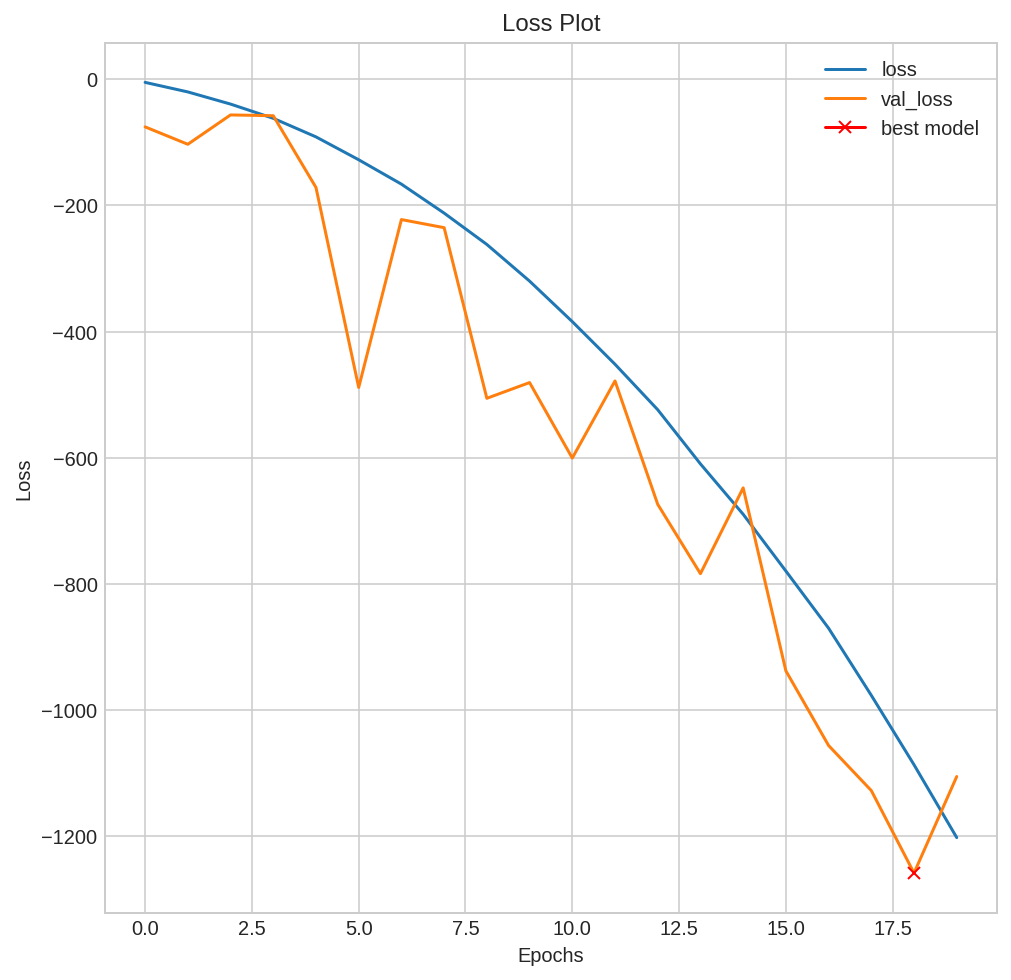

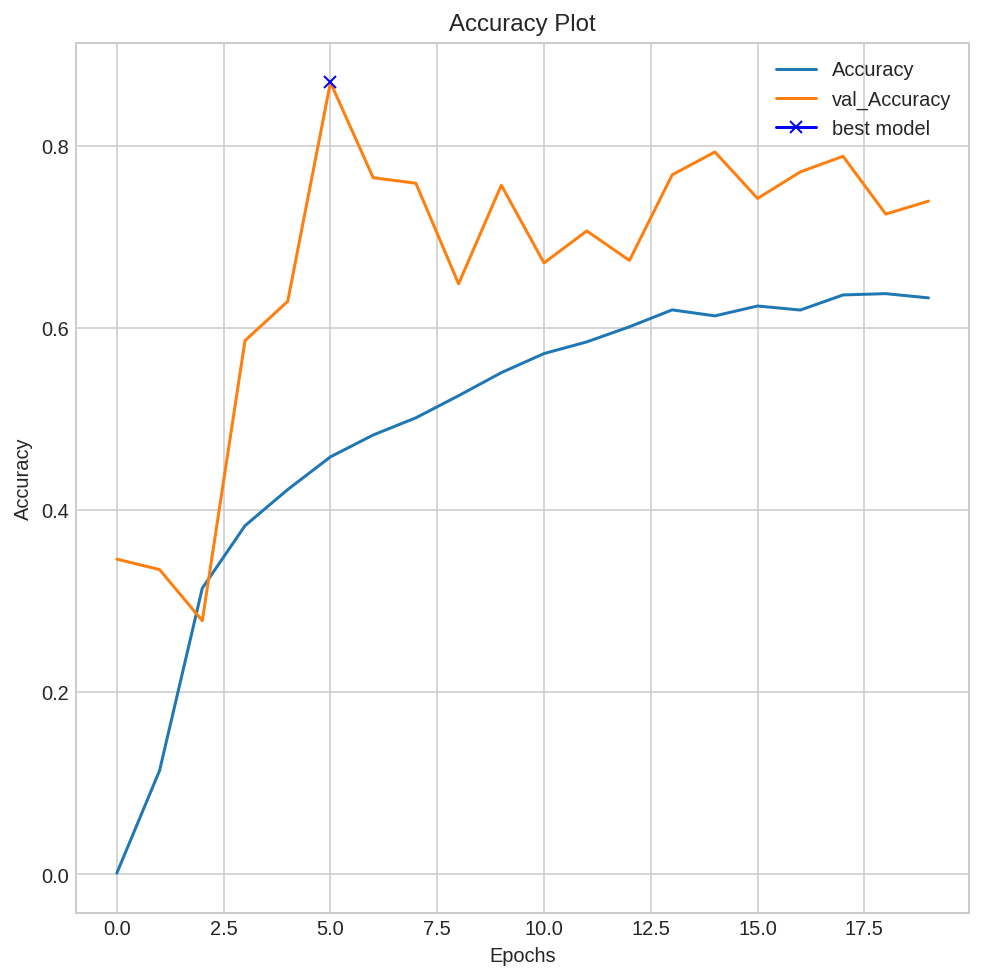

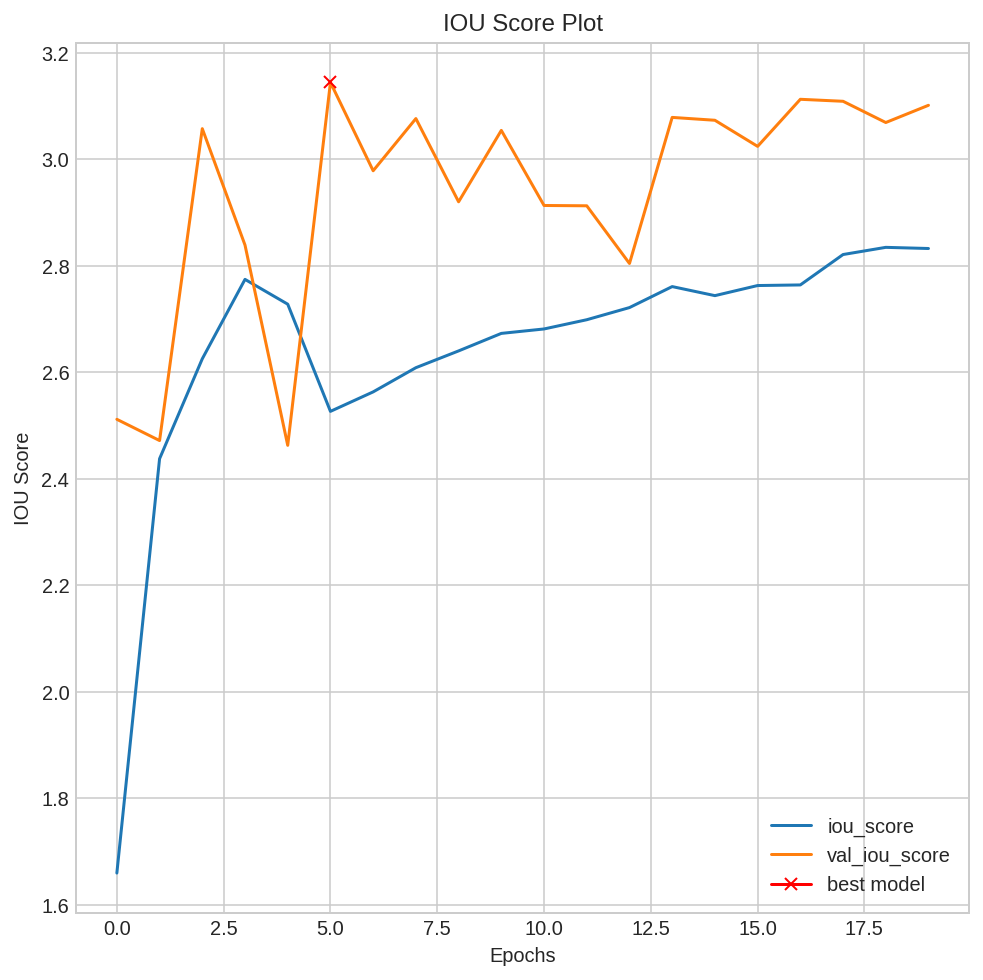

Dice Coeff :  1.5216081849774084
Accuracy 0.6676328748464584
Sensitivity :  0.0
F1-Score :  0.2596162498105678
Specificity :  1.0


In [52]:
eval = Evaluation(model, trainer1, test_images, test_labels)
eval.evaluation_of_measures()
eval.report()


<function matplotlib.pyplot.show(*args, **kw)>

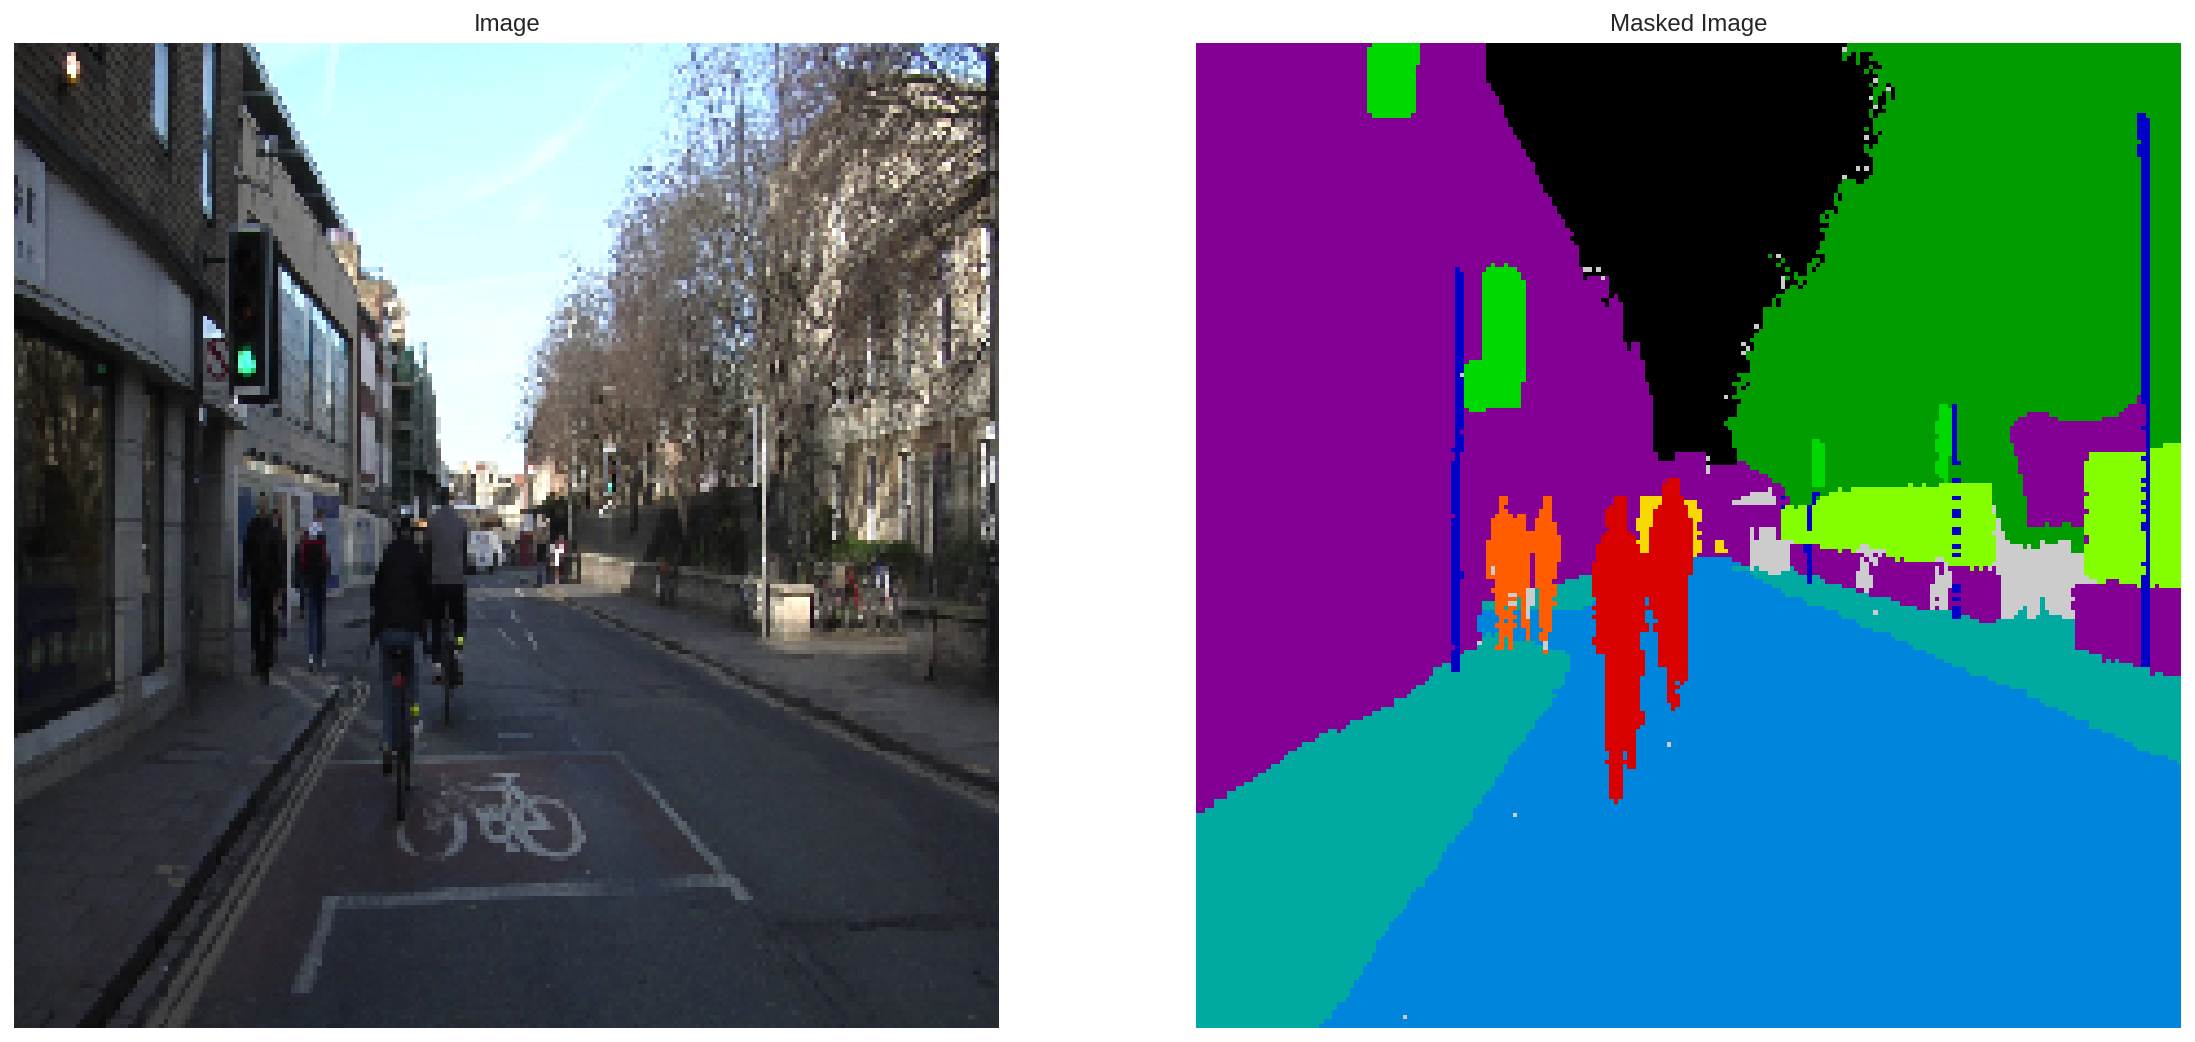

In [53]:
#Display the mask & original image for the test data
plt.figure(figsize=(30,30))
plt.subplot(1, 3, 1)
plt.imshow(test_images[50])
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[50], cmap='nipy_spectral')
plt.axis('off')
plt.title('Masked Image')
plt.show

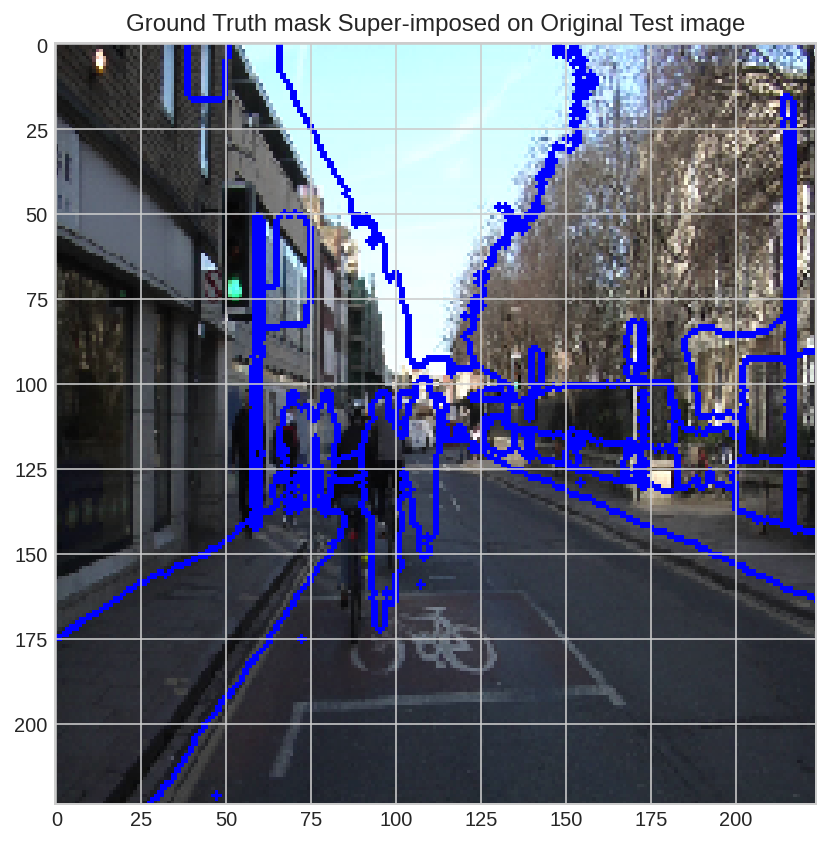

In [60]:
#Mark boundaries on test image
plt.figure(figsize=(7,7))
boundaries = seg.mark_boundaries(test_images[50], test_labels[50], color=(0,0,1), mode='thin')
plt.imshow(boundaries)
plt.title('Ground Truth mask Super‐imposed on Original Test image')
plt.show()

#Original image,Masked image & mask superimposed on original test image

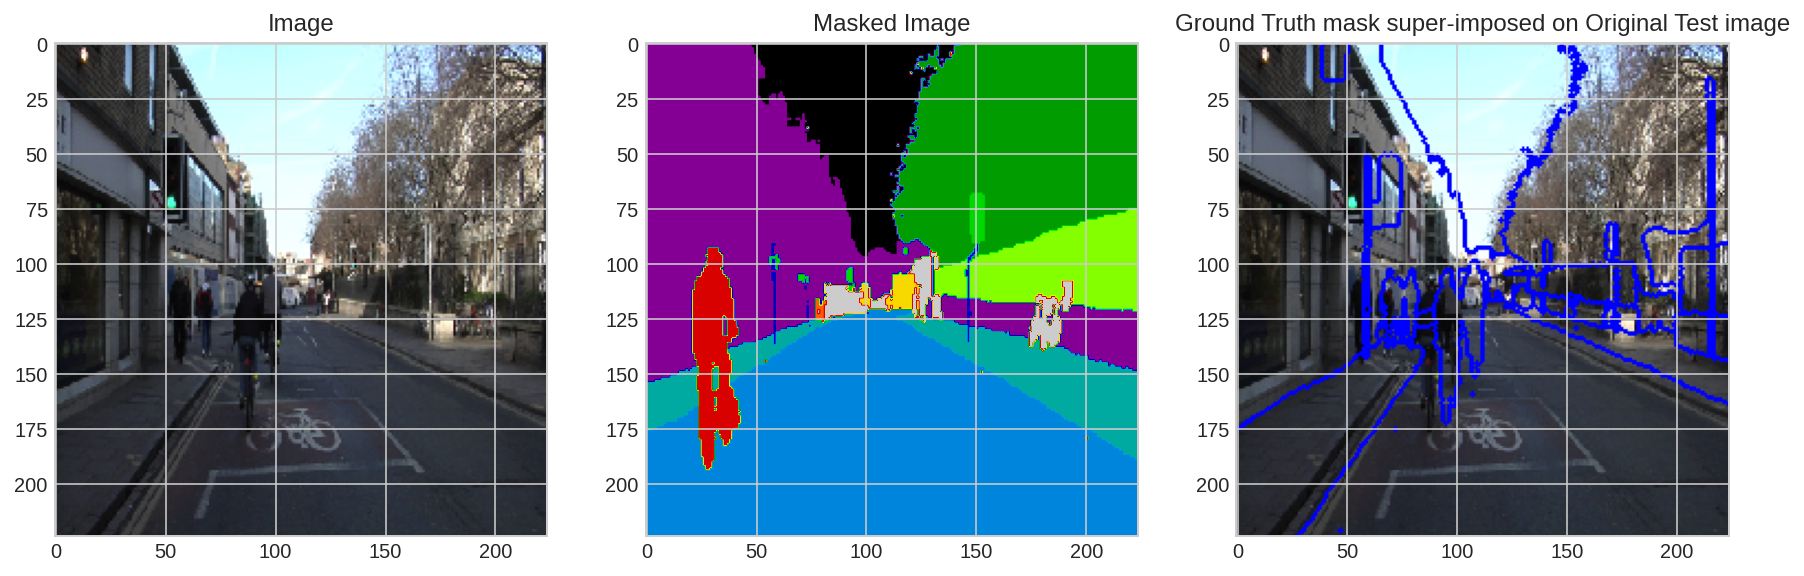

In [63]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(test_images[50])
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(test_labels[100], cmap='nipy_spectral')
plt.title('Masked Image')
plt.show


plt.subplot(1, 3, 3)
boundaries = seg.mark_boundaries(test_images[50], test_labels[50], color=(0,0,1), mode='thin')
plt.imshow(boundaries)
plt.title('Ground Truth mask super‐imposed on Original Test image')
plt.show()

4/4 [==============================] - 1s 174ms/step


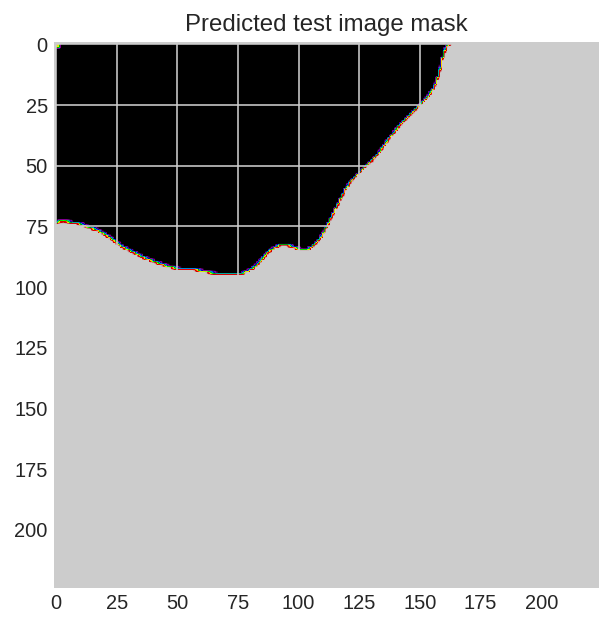

In [67]:
plt.figure(figsize=(5,5))
pre_img = model.predict(test_images)
p=pre_img[50]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)
plt.imshow(p, cmap='nipy_spectral')
plt.title('Predicted test image mask')
plt.show()




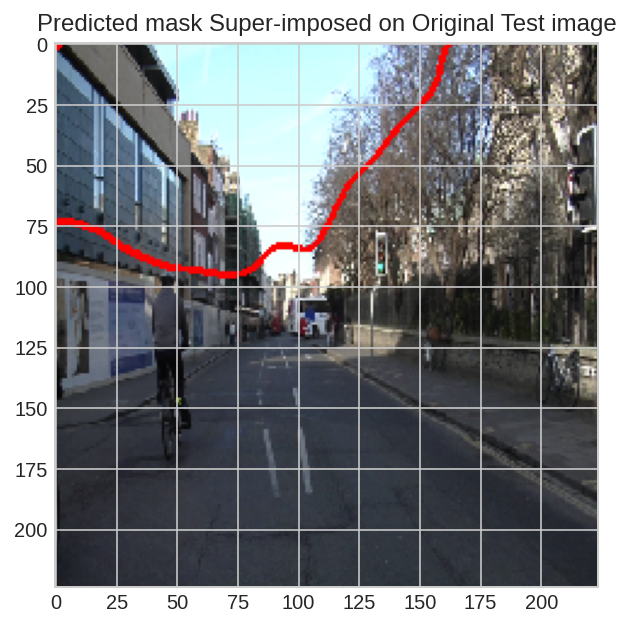

In [71]:
plt.figure(figsize=(5,5))
boundaries = seg.mark_boundaries(test_images[100], p, color=(1,0,0), mode='thin')
plt.imshow(boundaries)
plt.title('Predicted mask Super‐imposed on Original Test image')
plt.show()

##Transfer Learning with UNET Serexnext50
### By using imagenet pretrained encoder for Unet with backbone of Serexnext50

In [75]:
model1 = Unet(backbone_name='seresnext50', classes=12, encoder_weights='imagenet', encoder_freeze=True)
model1.compile(optimizer='Adam', loss=[bce_jaccard_loss], metrics=[iou_score, 'Accuracy'])

In [76]:
model1.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_90 (ZeroPadding  (None, None, None,   0          ['input[0][0]']                  
 2D)                            3)                                                                
                                                                                                  
 conv2d_1743 (Conv2D)           (None, None, None,   9408        ['zero_padding2d_90[0][0]']      
                                64)                                                        

In [34]:
plot_model(model1, to_file='/content/drive/My Drive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/Unet_SEresNext_model.png')

NameError: ignored

In [77]:
typeModel='Unet_seresnext50'
trainer2 = train_model(model1, tr_gen, val_gen, typeModel)
print("Unet_seresnext50 Trained")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
45/45 [==============================] - ETA: 0s - loss: -5.8583 - iou_score: 1.7720 - Accuracy: 6.1626e-04
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 107s 2s/step - loss: -5.8583 - iou_score: 1.7720 - Accuracy: 6.1626e-04 - val_loss: -92.6591 - val_iou_score: 1.6784 - val_Accuracy: 0.2114 - lr: 0.0010
Epoch 2/20
45/45 [==============================] - ETA: 0s - loss: -21.5929 - iou_score: 2.5091 - Accuracy: 0.1620
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 72s 2s/step - loss: -21.5929 - iou_score: 2.5091 - Accuracy: 0.1620 - val_loss: -87.1563 - val_iou_score: 2.4883 - val_Accuracy: 0.1464 - lr: 0.0010
Epoch 3/20
45/45 [==============================] - ETA: 0s - loss: -41.3883 - iou_score: 2.5665 - Accuracy: 0.2447
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 71s 2s/step - loss: -41.3883 - iou_score: 2.5665 - Accuracy: 0.2447 - val_loss: -62.8982 - val_iou_score: 2.6330 - val_Accuracy: 0.1923 - lr: 0.0010
Epoch 4/20
45/45 [==============================] - ETA: 0s - loss: -65.8392 - iou_score: 2.5984 - Accuracy: 0.3632
Epoch 4: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 72s 2s/step - loss: -65.8392 - iou_score: 2.5984 - Accuracy: 0.3632 - val_loss: -102.5875 - val_iou_score: 2.7172 - val_Accuracy: 0.3696 - lr: 0.0010
Epoch 5/20
45/45 [==============================] - ETA: 0s - loss: -97.4533 - iou_score: 2.5087 - Accuracy: 0.4141
Epoch 5: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 69s 2s/step - loss: -97.4533 - iou_score: 2.5087 - Accuracy: 0.4141 - val_loss: -301.2227 - val_iou_score: 2.8439 - val_Accuracy: 0.5350 - lr: 0.0010
Epoch 6/20
45/45 [==============================] - ETA: 0s - loss: -133.7914 - iou_score: 2.5660 - Accuracy: 0.4380
Epoch 6: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 64s 1s/step - loss: -133.7914 - iou_score: 2.5660 - Accuracy: 0.4380 - val_loss: -191.6528 - val_iou_score: 2.6992 - val_Accuracy: 0.3713 - lr: 0.0010
Epoch 7/20
45/45 [==============================] - ETA: 0s - loss: -178.6705 - iou_score: 2.6261 - Accuracy: 0.4695
Epoch 7: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 65s 1s/step - loss: -178.6705 - iou_score: 2.6261 - Accuracy: 0.4695 - val_loss: -345.7137 - val_iou_score: 2.9508 - val_Accuracy: 0.5302 - lr: 0.0010
Epoch 8/20
45/45 [==============================] - ETA: 0s - loss: -222.1160 - iou_score: 2.6746 - Accuracy: 0.4897
Epoch 8: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -222.1160 - iou_score: 2.6746 - Accuracy: 0.4897 - val_loss: -416.7517 - val_iou_score: 2.9722 - val_Accuracy: 0.5766 - lr: 0.0010
Epoch 9/20
45/45 [==============================] - ETA: 0s - loss: -275.3895 - iou_score: 2.6869 - Accuracy: 0.5173
Epoch 9: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -275.3895 - iou_score: 2.6869 - Accuracy: 0.5173 - val_loss: -674.9934 - val_iou_score: 2.9198 - val_Accuracy: 0.6318 - lr: 0.0010
Epoch 10/20
45/45 [==============================] - ETA: 0s - loss: -339.9490 - iou_score: 2.7211 - Accuracy: 0.5471
Epoch 10: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -339.9490 - iou_score: 2.7211 - Accuracy: 0.5471 - val_loss: -458.4135 - val_iou_score: 2.7952 - val_Accuracy: 0.6164 - lr: 0.0010
Epoch 11/20
45/45 [==============================] - ETA: 0s - loss: -406.4222 - iou_score: 2.7390 - Accuracy: 0.5688
Epoch 11: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -406.4222 - iou_score: 2.7390 - Accuracy: 0.5688 - val_loss: -752.1011 - val_iou_score: 2.9171 - val_Accuracy: 0.6837 - lr: 0.0010
Epoch 12/20
45/45 [==============================] - ETA: 0s - loss: -477.1979 - iou_score: 2.7457 - Accuracy: 0.5899
Epoch 12: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -477.1979 - iou_score: 2.7457 - Accuracy: 0.5899 - val_loss: -671.9348 - val_iou_score: 2.9179 - val_Accuracy: 0.6614 - lr: 0.0010
Epoch 13/20
45/45 [==============================] - ETA: 0s - loss: -557.7555 - iou_score: 2.7565 - Accuracy: 0.6002
Epoch 13: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -557.7555 - iou_score: 2.7565 - Accuracy: 0.6002 - val_loss: -664.0495 - val_iou_score: 2.8283 - val_Accuracy: 0.6571 - lr: 0.0010
Epoch 14/20
45/45 [==============================] - ETA: 0s - loss: -636.0673 - iou_score: 2.7676 - Accuracy: 0.6077
Epoch 14: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 62s 1s/step - loss: -636.0673 - iou_score: 2.7676 - Accuracy: 0.6077 - val_loss: -865.2206 - val_iou_score: 3.0830 - val_Accuracy: 0.7240 - lr: 0.0010
Epoch 15/20
45/45 [==============================] - ETA: 0s - loss: -726.6982 - iou_score: 2.7961 - Accuracy: 0.6198
Epoch 15: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 64s 1s/step - loss: -726.6982 - iou_score: 2.7961 - Accuracy: 0.6198 - val_loss: -1029.6486 - val_iou_score: 3.0165 - val_Accuracy: 0.7180 - lr: 0.0010
Epoch 16/20
45/45 [==============================] - ETA: 0s - loss: -819.9211 - iou_score: 2.7846 - Accuracy: 0.6098
Epoch 16: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 62s 1s/step - loss: -819.9211 - iou_score: 2.7846 - Accuracy: 0.6098 - val_loss: -1023.6343 - val_iou_score: 3.0544 - val_Accuracy: 0.7286 - lr: 0.0010
Epoch 17/20
45/45 [==============================] - ETA: 0s - loss: -929.5520 - iou_score: 2.8416 - Accuracy: 0.6265
Epoch 17: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -929.5520 - iou_score: 2.8416 - Accuracy: 0.6265 - val_loss: -899.1875 - val_iou_score: 2.9501 - val_Accuracy: 0.6777 - lr: 0.0010
Epoch 18/20
45/45 [==============================] - ETA: 0s - loss: -1044.6000 - iou_score: 2.8717 - Accuracy: 0.6272
Epoch 18: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 63s 1s/step - loss: -1044.6000 - iou_score: 2.8717 - Accuracy: 0.6272 - val_loss: -1070.4585 - val_iou_score: 2.9480 - val_Accuracy: 0.6881 - lr: 0.0010
Epoch 19/20
45/45 [==============================] - ETA: 0s - loss: -1144.1669 - iou_score: 2.8395 - Accuracy: 0.6200
Epoch 19: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 62s 1s/step - loss: -1144.1669 - iou_score: 2.8395 - Accuracy: 0.6200 - val_loss: -1169.5200 - val_iou_score: 2.9783 - val_Accuracy: 0.6911 - lr: 0.0010
Epoch 20/20
45/45 [==============================] - ETA: 0s - loss: -1267.1703 - iou_score: 2.8462 - Accuracy: 0.6237
Epoch 20: saving model to /content/drive/MyDrive/Colab Notebooks/A3_Dataset/A3_Dataset/dataset1/modelUnet_seresnext50.h5


45/45 [==============================] - 62s 1s/step - loss: -1267.1703 - iou_score: 2.8462 - Accuracy: 0.6237 - val_loss: -1163.1483 - val_iou_score: 2.8776 - val_Accuracy: 0.6776 - lr: 0.0010


Unet_seresnext50 Trained


5/5 [==============================] - 9s 310ms/step


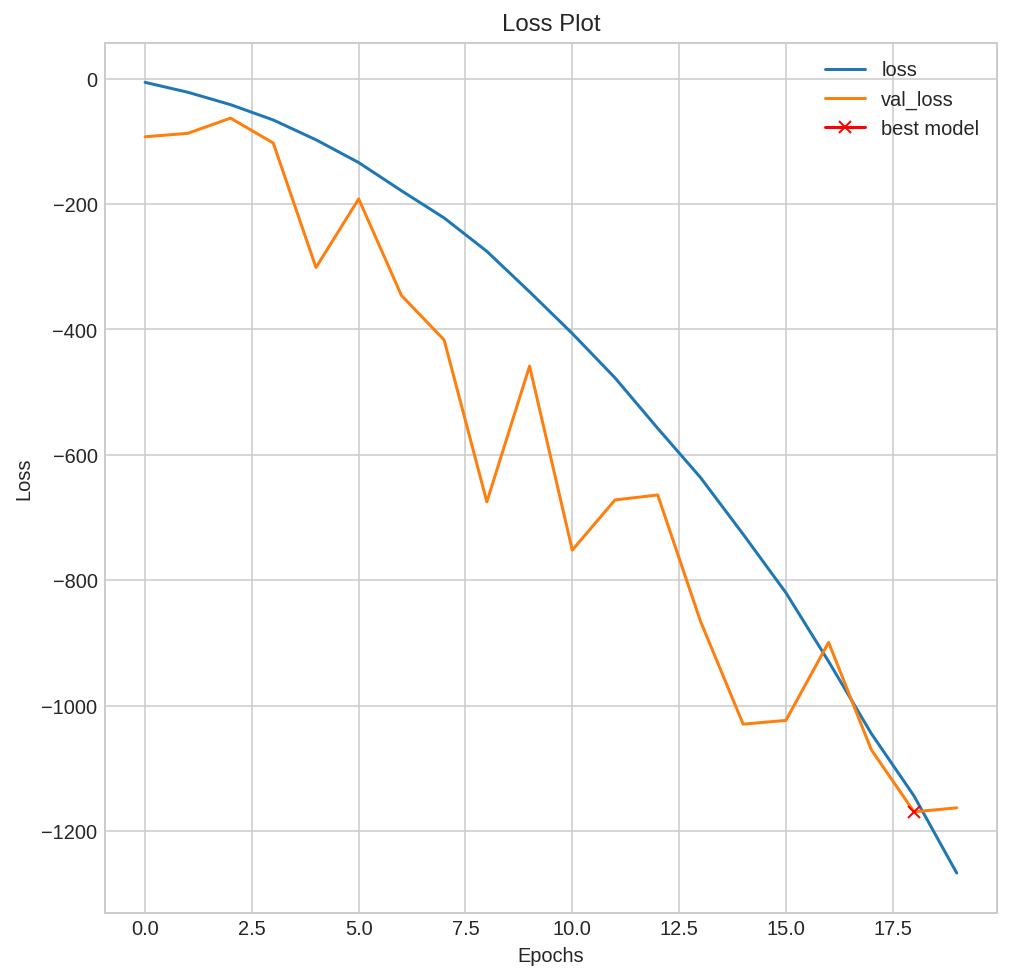

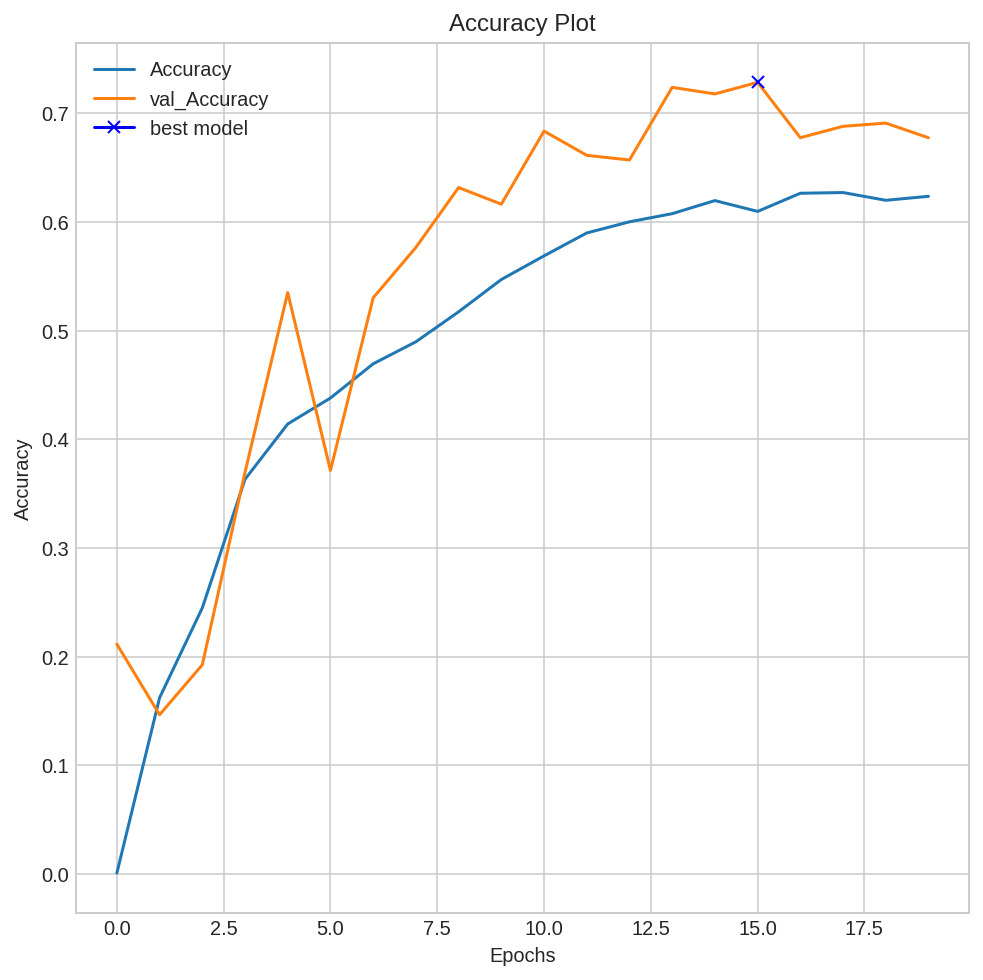

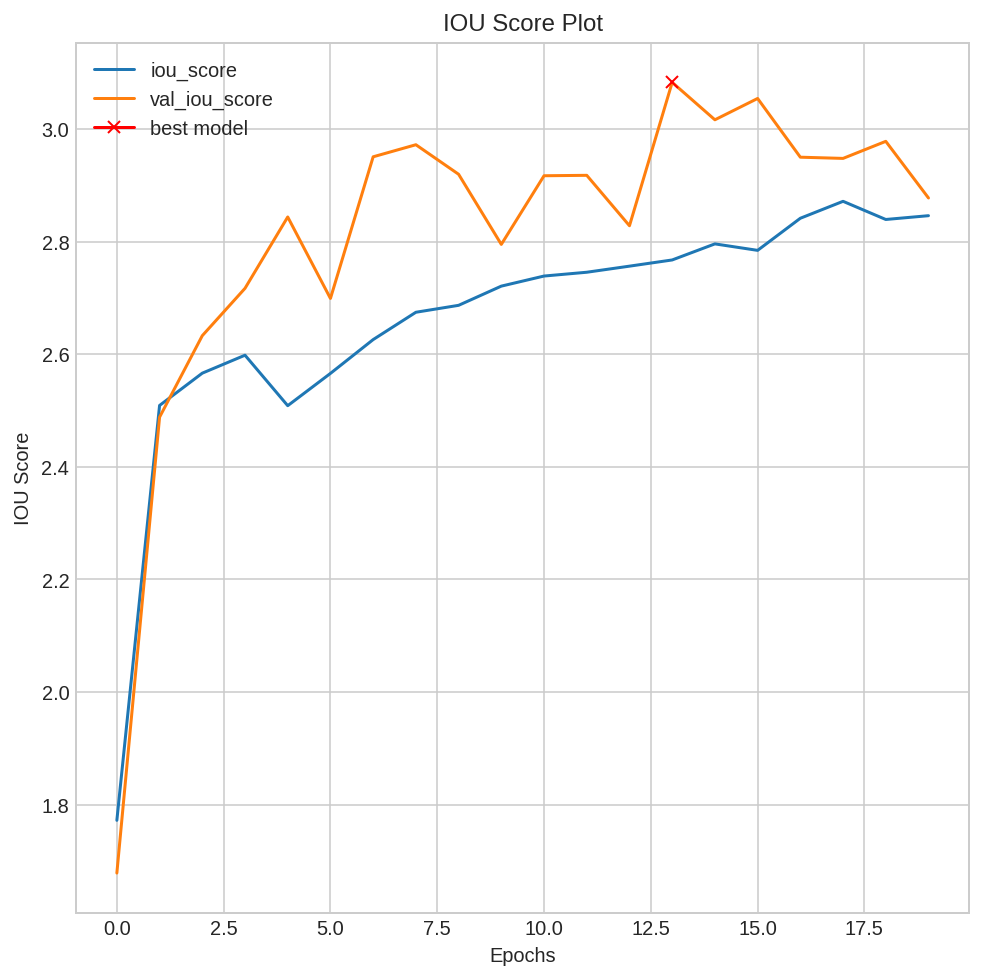

Dice Coeff :  1.5216081849774084
Accuracy 0.5544162414968014
Sensitivity :  0.0
F1-Score :  0.2596162498105678
Specificity :  1.0


In [78]:
#Curves & Evaluation matrics
eval1 = Evaluation(model1, trainer2, test_images, test_labels)
eval1.evaluation_of_measures()
eval1.report()

#Predicted mask & superimposition of predicted mask on original test image 

4/4 [==============================] - 1s 185ms/step


<function matplotlib.pyplot.show(*args, **kw)>

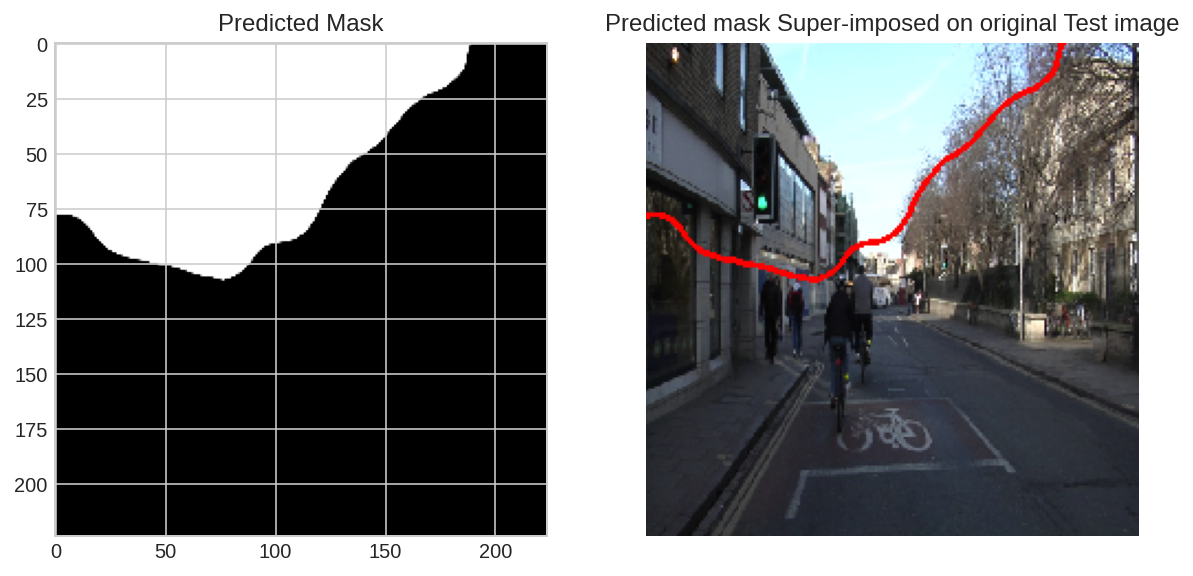

In [84]:
plt.figure(figsize = (15,15))
pred_image = model1.predict(test_images)
p=pred_image[50]
index_array = np.argmax(p, axis=-1)
p=np.take_along_axis(p, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

plt.subplot(1, 3, 1)
plt.imshow(p)
plt.title('Predicted Mask')

#plotting ground label
plt.subplot(1, 3, 2)
boundaries = seg.mark_boundaries(test_images[50], p1, color=(1,0,0), mode='thin')
plt.imshow(boundaries, cmap='nipy_spectral')
plt.axis('off')
plt.title('Predicted mask Super‐imposed on original Test image')
plt.show

#Original image image,masked image & superimposition on gtest image

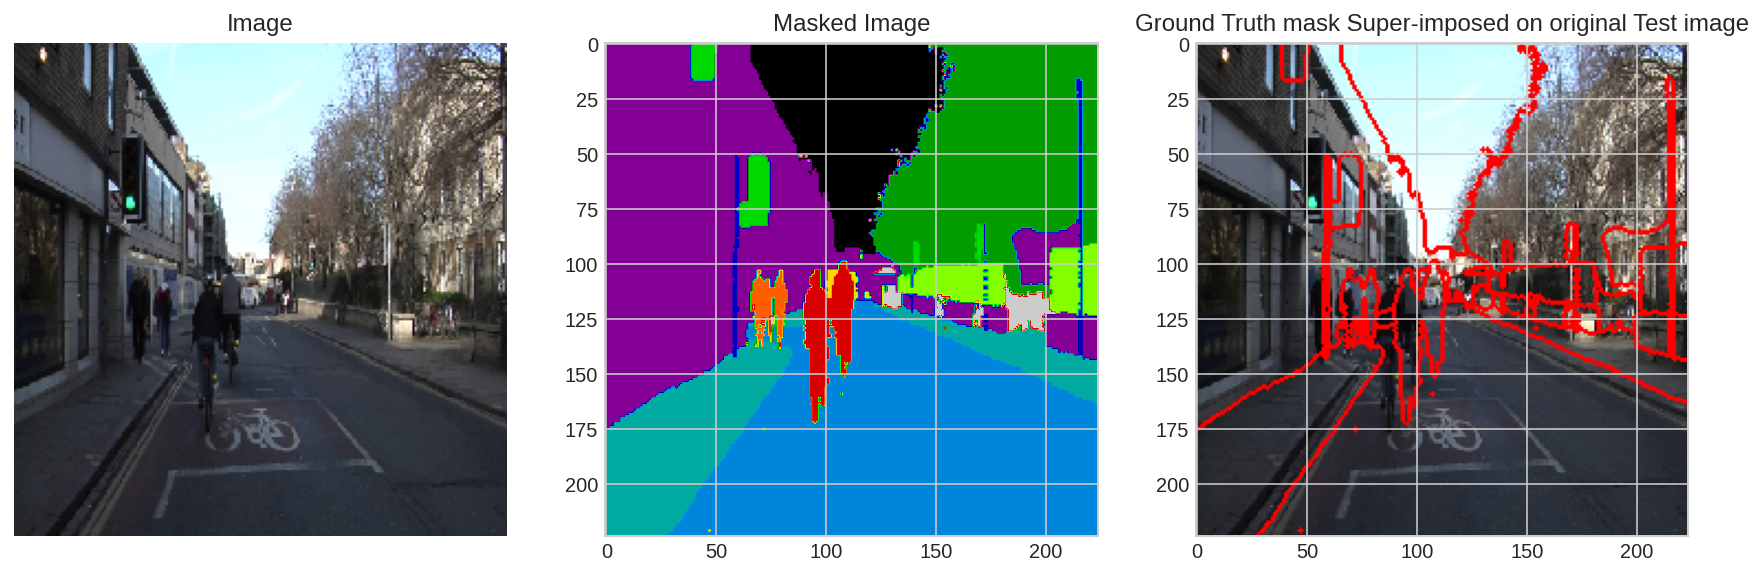

In [81]:
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)
plt.imshow(test_images[50])
plt.axis('off')
plt.title('Image')

plt.subplot(1, 3, 2)
plt.imshow(test_labels[50], cmap='nipy_spectral')
plt.title('Masked Image')
plt.show


plt.subplot(1, 3, 3)
boundaries = seg.mark_boundaries(test_images[50], test_labels[50], color=(1,0,0), mode='thin')
plt.imshow(boundaries)
plt.title('Ground Truth mask Super‐imposed on original Test image')
plt.show()